<a href="https://colab.research.google.com/github/kabir993/kabiropedia/blob/main/function_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<ipython-input-16-e6b3b505c7aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


<function matplotlib.pyplot.show(close=None, block=None)>

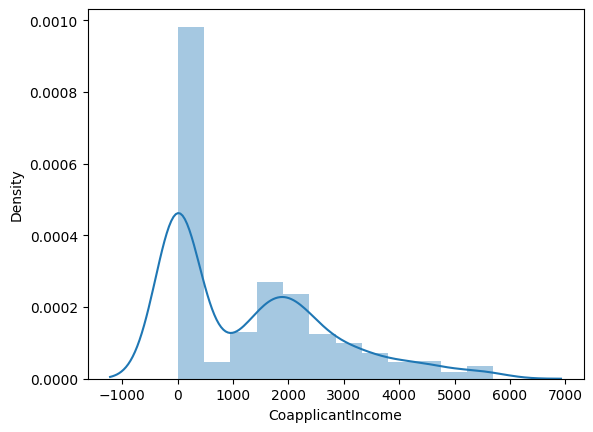

In [ ]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show

In [ ]:
q1=dataset['CoapplicantIncome'].quantile(0.25)
q3=dataset['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1


In [ ]:
min_val=q1-1.5*iqr
max_val=q3+1.5*iqr

In [ ]:
min_val,max_val

(-3445.875, 5743.125)

In [ ]:
dataset=dataset[dataset['CoapplicantIncome']<max_val]

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(func=np.log1p)

In [ ]:
ft.fit(dataset['CoapplicantIncome'])

FunctionTransformer(func=<ufunc 'log1p'>)

In [ ]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[['CoapplicantIncome']])

<ipython-input-25-a06bc804da0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
<ipython-input-25-a06bc804da0c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf'])


<function matplotlib.pyplot.show(close=None, block=None)>

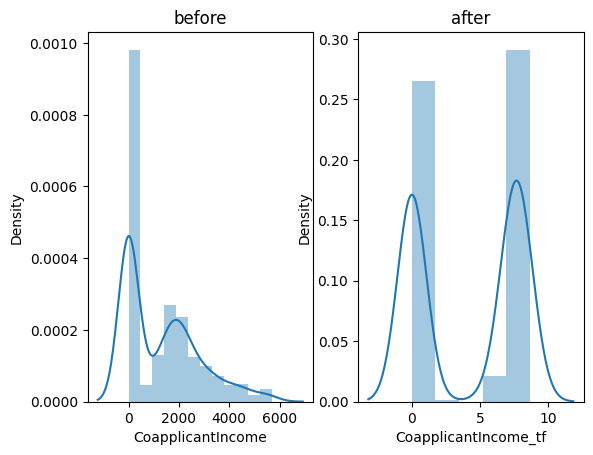

In [ ]:
plt.subplot(1,2,1)
sns.distplot(dataset['CoapplicantIncome'])
plt.title("before")
plt.subplot(1,2,2)
sns.distplot(dataset['CoapplicantIncome_tf'])
plt.title("after")
plt.show